In [1610]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from io import StringIO
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
print('Libraries imported.')

Libraries imported.


In [1616]:
from bs4 import BeautifulSoup
# import pandas as pd
# import numpy as np
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# Get data and clean data

In [880]:
df_all = pd.read_csv('london-borough-profiles-2016 Data set.csv')

In [881]:
df_all.shape

(40, 85)

In [882]:
df_all = df_all[['Code', 'New code', 'Area name', 'Inner/ Outer London',
        'GLA Population Estimate 2016', 'GLA Household Estimate 2016',
        'Population density (per hectare) 2016','Proportion of population of working-age, 2016',
         'Proportion of population aged 0-15, 2016','Proportion of population aged 65 and over, 2016',
        '% of resident population born abroad (2014)','Largest migrant population by country of birth (2011)',
        'Second largest migrant population by country of birth (2011)','Third largest migrant population by country of birth (2011)',
        'Employment rate (%) (2015)', 'Unemployment rate (2015)','Gross Annual Pay, (2015)',
        'Modelled Household median income estimates 2012/13', 'Jobs Density, 2014', 'Number of active businesses, 2014', 
        'Two-year business survival rates (started in 2012)','Crime rates per thousand population 2014/15',
        'Median House Price, 2014','Life satisfaction score 2011-14 (out of 10)', 'Happiness score 2011-14 (out of 10)',
        'Anxiety score 2011-14 (out of 10)']]

In [883]:
df_all.drop(['Code'], axis=1, inplace=True)

In [884]:
df_all.shape

(40, 25)

In [885]:
new_columns = ['Code', 'Area_Name', 'Inner_London', 'Population',
              'Households', 'Population_Density', 'Working_Population','Youth_Population',
              'Elderly_Population', 'Born_Abroad', 'Fist_Migrants', 'Second_Migrants', 'Third_Migrants',
              'Employment', 'Unemployment', 'Annual_Pay', 'Median_Income_H','Job_Density', 'Active_Business',
              'Suvirval_Rate_2Years', 'Crime', 'House_Price', 'Life_Satisfcation', 'Happiness', 'Anxiety']

In [886]:
df_all.columns = new_columns

In [1603]:
df_all.head()

,Code,Area_Name,Inner_London,Population,Households,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Fist_Migrants,Second_Migrants,Third_Migrants,Employment,Unemployment,Annual_Pay,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Crime,House_Price,Life_Satisfcation,Happiness,Anxiety,Latitude,Longitude
0,E09000001,City of London,Inner London,8548,5179,28.9,90.6,27.2,9.4,0.0,United States,France,Australia,64.6,0.0,0,99390,84.60,19250,63.0,0.0,765000,6.59,5.99,5.57,51.515618,-0.091998
1,E09000002,Barking and Dagenham,Outer London,205773,76841,57.3,86.1,21.0,13.9,37.4,Nigeria,India,Pakistan,65.8,11.0,28428,34080,0.47,5690,73.0,83.4,215000,7.14,7.05,3.05,51.554117,0.150504
2,E09000003,Barnet,Outer London,385108,149147,44.5,83.3,21.0,16.7,35.9,India,Poland,Iran,68.5,8.5,33084,54530,0.69,24555,70.0,62.7,400000,7.48,7.37,2.75,51.653090,-0.200226
3,E09000004,Bexley,Outer London,243303,97233,39.9,89.0,20.8,11.0,16.1,Nigeria,India,Ireland,75.1,7.6,32040,44430,0.54,8430,75.0,51.8,250000,7.38,7.21,3.29,51.441679,0.150488
4,E09000005,Brent,Outer London,328568,119166,76.1,82.5,20.1,17.5,56.2,India,Poland,Ireland,69.5,7.5,29777,39630,0.61,14680,70.0,78.8,385000,7.25,7.22,2.92,51.563826,-0.275760


In [890]:
df_all = df_all[1:33].reset_index()

In [891]:
df_all.Median_Income_H = df_all.Median_Income_H.apply(lambda x : x.replace(',' , '').replace('£' , '')).astype(int)

#df.Median_Income_H = df.Median_Income_H.apply(lambda x : x.replace(',' , '').replace('£' , '')).astype(int)

### Select just the inner London areas for simplicity

#df = df[df.Inner_London == "Inner London"].reset_index()

#df.drop(['index'], axis=1,inplace=True)

In [894]:
df_all.drop(['index'], axis=1,inplace=True)

In [895]:
df_all.head()

,Code,Area_Name,Inner_London,Population,Households,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Fist_Migrants,Second_Migrants,Third_Migrants,Employment,Unemployment,Annual_Pay,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Crime,House_Price,Life_Satisfcation,Happiness,Anxiety
0,E09000001,City of London,Inner London,"8,548","5,179",28.9,90.6,27.2,9.4,.,United States,France,Australia,64.6,.,.,99390,84.60,"19,250",63.0,.,"765,000",6.59,5.99,5.57
1,E09000002,Barking and Dagenham,Outer London,"205,773","76,841",57.3,86.1,21.0,13.9,37.4,Nigeria,India,Pakistan,65.8,11.0,"£28,428",34080,0.47,"5,690",73.0,83.4,"215,000",7.14,7.05,3.05
2,E09000003,Barnet,Outer London,"385,108","149,147",44.5,83.3,21.0,16.7,35.9,India,Poland,Iran,68.5,8.5,"£33,084",54530,0.69,"24,555",70.0,62.7,"400,000",7.48,7.37,2.75
3,E09000004,Bexley,Outer London,"243,303","97,233",39.9,89.0,20.8,11.0,16.1,Nigeria,India,Ireland,75.1,7.6,"£32,040",44430,0.54,"8,430",75.0,51.8,"250,000",7.38,7.21,3.29
4,E09000005,Brent,Outer London,"328,568","119,166",76.1,82.5,20.1,17.5,56.2,India,Poland,Ireland,69.5,7.5,"£29,777",39630,0.61,"14,680",70.0,78.8,"385,000",7.25,7.22,2.92


In [61]:
# df.Population = df.Population.apply(lambda x : x.replace(',' , '')).astype(int)

# df.Households = df.Households.apply(lambda x : x.replace(',' , '')).astype(int)

# df.Population_Density = df.Population_Density.astype(float)

# df.Working_Population = df.Working_Population.astype(float)

# df.Youth_Population = df.Youth_Population.astype(float)

# df.Elderly_Population = df.Elderly_Population.astype(float)

# df.Born_Abroad = df.Born_Abroad.replace('.',0).astype(float)

# df.Employment = df.Employment.astype(float)

# df.Unemployment = df.Unemployment.replace('.',0).astype(float)

# df.Crime = df.Crime.replace('.',0).astype(float)

# df.Annual_Pay = df.Annual_Pay.replace('.','0').apply(lambda x : x.replace(',' , '').replace('£' , '')).astype(int)

# df.Job_Density = df.Job_Density.astype(float)

# df[['Suvirval_Rate_2Years','Life_Satisfcation','Happiness','Anxiety']] = df[['Suvirval_Rate_2Years','Life_Satisfcation','Happiness','Anxiety']].astype(float)

# df.Active_Business = df['Active_Business'].apply(lambda x : x.replace(',' , '')).astype(int)

# df.House_Price = df['House_Price'].apply(lambda x : x.replace(',' , '')).astype(int)

In [898]:
df_all.Population = df_all.Population.apply(lambda x : x.replace(',' , '')).astype(int)

df_all.Households = df_all.Households.apply(lambda x : x.replace(',' , '')).astype(int)

df_all.Population_Density = df_all.Population_Density.astype(float)

df_all.Working_Population = df_all.Working_Population.astype(float)

df_all.Youth_Population = df_all.Youth_Population.astype(float)

df_all.Elderly_Population = df_all.Elderly_Population.astype(float)

df_all.Born_Abroad = df_all.Born_Abroad.replace('.',0).astype(float)

df_all.Employment = df_all.Employment.astype(float)

df_all.Unemployment = df_all.Unemployment.replace('.',0).astype(float)

df_all.Crime = df_all.Crime.replace('.',0).astype(float)

df_all.Annual_Pay = df_all.Annual_Pay.replace('.','0').apply(lambda x : x.replace(',' , '').replace('£' , '')).astype(int)

df_all.Job_Density = df_all.Job_Density.astype(float)

df_all[['Suvirval_Rate_2Years','Life_Satisfcation','Happiness','Anxiety']] = df_all[['Suvirval_Rate_2Years','Life_Satisfcation','Happiness','Anxiety']].astype(float)

df_all.Active_Business = df_all['Active_Business'].apply(lambda x : x.replace(',' , '')).astype(int)

df_all.House_Price = df_all['House_Price'].apply(lambda x : x.replace(',' , '')).astype(int)

In [899]:
df_all.head()

,Code,Area_Name,Inner_London,Population,Households,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Fist_Migrants,Second_Migrants,Third_Migrants,Employment,Unemployment,Annual_Pay,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Crime,House_Price,Life_Satisfcation,Happiness,Anxiety
0,E09000001,City of London,Inner London,8548,5179,28.9,90.6,27.2,9.4,0.0,United States,France,Australia,64.6,0.0,0,99390,84.60,19250,63.0,0.0,765000,6.59,5.99,5.57
1,E09000002,Barking and Dagenham,Outer London,205773,76841,57.3,86.1,21.0,13.9,37.4,Nigeria,India,Pakistan,65.8,11.0,28428,34080,0.47,5690,73.0,83.4,215000,7.14,7.05,3.05
2,E09000003,Barnet,Outer London,385108,149147,44.5,83.3,21.0,16.7,35.9,India,Poland,Iran,68.5,8.5,33084,54530,0.69,24555,70.0,62.7,400000,7.48,7.37,2.75
3,E09000004,Bexley,Outer London,243303,97233,39.9,89.0,20.8,11.0,16.1,Nigeria,India,Ireland,75.1,7.6,32040,44430,0.54,8430,75.0,51.8,250000,7.38,7.21,3.29
4,E09000005,Brent,Outer London,328568,119166,76.1,82.5,20.1,17.5,56.2,India,Poland,Ireland,69.5,7.5,29777,39630,0.61,14680,70.0,78.8,385000,7.25,7.22,2.92


# Get Venues

In [129]:
def getRanking(id):
    venue_id = id # ID of Harry's Italian Pizza Bar
    rating = 0
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, 
                                                                                              CLIENT_ID,
                                                                                              CLIENT_SECRET,
                                                                                              VERSION)
    result = requests.get(url).json()
    try:
        rating = result['response']['venue']['rating']
    except:
        #print('This venue has not been rated yet.')
    return rating

In [913]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        print(url)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results[0]['venue']['id'])
        #rating = getRanking( results[0]['venue']['id']) 
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            #rating,
            v['venue']['name'], 
            getRanking(v['venue']['id']),
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Ranking',
                  'Venue_ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [118]:
CLIENT_ID = 'GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH' # your Foursquare ID
CLIENT_SECRET = 'HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius

Your credentails:
CLIENT_ID: GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH
CLIENT_SECRET:HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO


In [168]:
def geo(ad):
    try:
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(ad)
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude=0.0
        longitude=0.0
        print(ad)
    return latitude,longitude

In [901]:
get_locations = df_all.Area_Name.apply(lambda x: geo(x + " London, UK")).to_frame()

#tt = df.Area_Name.apply(lambda x: geo(x + " London, UK")).to_frame()

df_all[['Latitude','Longitude']] = get_locations.Area_Name.apply(pd.Series)

In [1605]:
df_all.head(1)

,Code,Area_Name,Inner_London,Population,Households,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Fist_Migrants,Second_Migrants,Third_Migrants,Employment,Unemployment,Annual_Pay,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Crime,House_Price,Life_Satisfcation,Happiness,Anxiety,Latitude,Longitude
0,E09000001,City of London,Inner London,8548,5179,28.9,90.6,27.2,9.4,0.0,United States,France,Australia,64.6,0.0,0,99390,84.6,19250,63.0,0.0,765000,6.59,5.99,5.57,51.515618,-0.091998


In [904]:
df_all.to_csv('cleaned_data_v2_including_outer.csv')

In [186]:
#get venues for df (inner london v1)
london_venues = getNearbyVenues(names=df['Area_Name'],
                                    latitudes=df['Latitude'],
                                    longitudes=df['Longitude']
                                   )

City of London
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5156177,-0.0919983&radius=500&limit=20
Camden
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5423045,-0.1395604&radius=500&limit=20
Hackney
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5432402,-0.0493621&radius=500&limit=20
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
Tower Hamlets
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5086717,-0.016911863941739255&radius=500&limit=20
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has n

In [ ]:
london_venues.to_csv('london_venues.csv')

In [649]:
#second try to get venues for inner london 2
london_venues2 = getNearbyVenues(names=df['Area_Name'],
                                    latitudes=df['Latitude'],
                                    longitudes=df['Longitude']
                                   )
london_venues2.to_csv('Second London Venues.csv')
london_venues2['Neighborhood'] = london_venues.Neighborhood

City of London
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5156177,-0.0919983&radius=500&limit=100
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been r

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not b

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
Lambeth
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5013012,-0.117287&radius=500&limit=100
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
Tower Hamlets
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5086717,-0.016911863941739255&r

In [920]:
#4rth try to get venues, now for all areas not just for inner london
london_venues4 = getNearbyVenues(names=df_all['Area_Name'],
                                    latitudes=df_all['Latitude'],
                                    longitudes=df_all['Longitude']
                                   )

City of London
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5156177,-0.0919983&radius=500&limit=100
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been r

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
Camden
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5423045,-0.1395604&radius=500&limit=100
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
Enfield
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.6520851,-0.0810175&radius=500&limit=100
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated ye

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not b

This venue has not been rated yet.
Islington
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.5384287,-0.0999051&radius=500&limit=100
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated 

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
Lambeth
https://api.foursquare.com/v2/venues/explore?&client_id=GVMIFYRIMJR425HJGDVEOXGJARHQG4BRTEOJW0ITKH45T1CH&client_secret=HDRO5LDFFIXOL5FOW01DO3TBJIUYKFEF301LDRNEX2H4RXMO&v=20180605&ll=51.50

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not b

In [933]:
london_venues4.to_csv('extended_venues_4_data.csv')

## Try to get ranking based via web srapping [Not working due to Foursqare protection mechanism]

In [981]:

# def get_ranking_bs(name, ids):
#     URL = "https://foursquare.com/v/"+ name+ '/'+ids
#     print(URL)
#     page = requests.get(URL)
#     print(page)
#     soup = BeautifulSoup(page.content, 'html.parser')
#     tt = soup.find("span", itemprop="ratingValue")
#     print(tt)
#     xx= 99.00
#     try: 
#         xx = tt.get_text()
#     except:
#         print("error - ", "ID: ", id, tt)
#     return float(xx)

In [1606]:
#london_venues4[london_venues4.Ranking == 0][0:2].apply(lambda x: get_ranking_bs(x['Venue_ID']),axis=1 )

#london_venues4[london_venues4.Ranking == 0][0:1].apply(lambda x: get_ranking_bs(x['Venue'].replace(' ','-'),x['Venue_ID']),axis=1)

#london_venues4.Venue[0].replace(' ','-')

#yyy = london_venues4[['Venue', 'Venue_ID']]

#london_venues4[london_venues4.Ranking == 0][0:5]

#get_ranking_bs('4c5190663940be9a0f2c0f09')

#london_venues3[london_venues3.Ranking >0

In [ ]:
searchforrest = ['Restaurant','Sandwich','Steakhouse','Fish & Chips','Burger','Pizza']
searchforbars = ['Pub','Bar']
searchforextra = searchforrest+ searchforcoffee+searchforbars
searchforcoffee = ['Cafe','Coffee','Café']

## Filter out restaurants from venues 4 

In [1006]:

## RESTAURANTS
## count - grouped by area/neigh
## restaurants_london - df with all locations that are restaurants
restaurants_counts2 = london_venues4[london_venues4["Venue Category"].str.contains('|'.join(searchforrest))].groupby('Neighborhood').count()['Venue Category'].to_frame()

restaurant_london2 = london_venues4[london_venues4["Venue Category"].str.contains('|'.join(searchforrest))]


## BARS
## count - grouped by area/neigh
## bars_london - df with all locations that are bars
bars_counts2 = london_venues4[london_venues4["Venue Category"].str.contains('|'.join(searchforbars))].groupby('Neighborhood').count()['Venue Category'].to_frame()

bars_london2 = london_venues4[london_venues4["Venue Category"].str.contains('|'.join(searchforbars))]

## COFFEE SHOPS
## count - grouped by area/neigh
## coffee_london - df with all locations that are coffe
coffee_counts2 = london_venues4[london_venues4["Venue Category"].str.contains('|'.join(searchforcoffee))].groupby('Neighborhood').count()['Venue Category'].to_frame()
coffee_london2 = london_venues4[london_venues4["Venue Category"].str.contains('|'.join(searchforcoffee))]

## OTHER VENUES
## count - grouped by area/neigh
## coffee_london - df with all locations that are other venues
extra_london2 = london_venues4[~london_venues4["Venue Category"].str.contains('|'.join(searchforextra))]
extra_counts2 = london_venues4[~london_venues4["Venue Category"].str.contains('|'.join(searchforextra))].groupby('Neighborhood').count()['Venue Category'].to_frame()



## food_cofee_bars aggregation
## count - grouped by area/neigh
# food_cofee_bars_df2 = pd.merge(restaurants_counts2,bars_counts2,
#                               on='Neighborhood').merge(coffee_counts2,
#                             on='Neighborhood').merge(extra_counts2,on ='Neighborhood', how='left')

# food_cofee_bars_df2 = df_all['Area_Name'].to_frame()

food_cofee_bars_df2 = food_cofee_bars_df2.merge(restaurants_counts2,left_on='Area_Name',
                              right_on='Neighborhood', how='left').merge(bars_counts2,
                            left_on='Area_Name',right_on='Neighborhood', how='left').merge(coffee_counts2,
                            left_on='Area_Name',right_on='Neighborhood', how='left').merge(extra_counts2,
      left_on='Area_Name',right_on='Neighborhood', how='left')

food_cofee_bars_df2.columns=['Area_Name','Restaurants#','Bars#','Coffee#','Extra#']
food_cofee_bars_df2.fillna(0, inplace=True)

In [1607]:
food_cofee_bars_df2.head(2)

,Area_Name,Restaurants#,Bars#,Coffee#,Extra#
0,City of London,33.0,7.0,12.0,48.0
1,Barking and Dagenham,0.0,0.0,0.0,5.0


## Split the data into venues categories: restaurants, bars, coffee and extra from Venues 2 - inner london only

In [1091]:
# extra_london = london_venues2[~london_venues2["Venue Category"].str.contains('|'.join(searchforextra))]

# extra_counts = london_venues2[~london_venues2["Venue Category"].str.contains('|'.join(searchforextra))].groupby('Neighborhood').count()['Venue Category'].to_frame()

# restaurants_counts = london_venues2[london_venues2["Venue Category"].str.contains('|'.join(searchforrest))].groupby('Neighborhood').count()['Venue Category'].to_frame()

# restaurant_london = london_venues2[london_venues2["Venue Category"].str.contains('|'.join(searchforrest))]

# total_food_coffe_bars = restaurant_london.Ranking.count() + bars_london.Ranking.count() + coffee_london.Ranking.count()

# total_food_coffe_bars/london_venues2.Ranking.count()

# restaurants_per = restaurants_counts.sum()/london_venues2.Ranking.count()

# bars_per = bars_counts.sum()/london_venues2.Ranking.count()

# coffee_per = coffee_counts.sum()/london_venues2.Ranking.count()

# bars_counts = london_venues2[london_venues2["Venue Category"].str.contains('|'.join(searchforbars))].groupby('Neighborhood').count()['Venue Category'].to_frame()

# bars_london = london_venues2[london_venues2["Venue Category"].str.contains('|'.join(searchforbars))]

# coffee_counts = london_venues2[london_venues2["Venue Category"].str.contains('|'.join(searchforcoffee))].groupby('Neighborhood').count()['Venue Category'].to_frame()

# coffee_london = london_venues2[london_venues2["Venue Category"].str.contains('|'.join(searchforcoffee))]

# food_cofee_bars_df = df_all['Area_Name'].merge(restaurants_counts, left_on='Area_Name', 
#                                                right_on='Neighborhood').merge(bars_counts,
#                               on='Neighborhood').merge(coffee_counts,
#                             on='Neighborhood').merge(extra_counts,on ='Neighborhood', how='left')

# food_cofee_bars_df.columns=['Restaurants#','Bars#','Coffee#','Extra#']

# all_rest_bars_coffee = london_venues2[london_venues2["Venue Category"].str.contains('|'.join(searchforextra))]

# food_cofee_bars_df

# Create the aggregated table (using df_all and venues4)

In [1234]:
FINAL_TABLE_2= df_all.groupby(['Area_Name']).mean().merge(food_cofee_bars_df2,on='Area_Name')

In [1609]:
#check correlation
FINAL_TABLE_2.corr()[0:1]

,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#,Cluster,Cluster2,Cluster_Reduced1,Cluster_Reduced2
Population,1.0,0.003469,0.007835,-0.049199,-0.007835,0.328925,0.138877,-0.67848,-0.655559,0.106711,0.259696,0.300653,-0.584988,0.195955,0.074453,-0.336057,-0.163597,-0.265923,-0.328243,0.227675,0.117788,0.039834,0.039834


In [1611]:
#check where correlations are very high to indentify the duplicated data
FINAL_TABLE_2.corr()[FINAL_TABLE_2.corr()>0.80]

,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#,Cluster,Cluster2,Cluster_Reduced1,Cluster_Reduced2
Population,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population_Density,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Working_Population,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Youth_Population,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elderly_Population,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Born_Abroad,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Median_Income_H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.835113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Active_Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Conclusions
- households and population has a very high correlation so one howsholds will be dropped
- median income and house price has a high correlation so house price will be dropped
- life satisfaction and happiness have a high correlation so happiness will be dropped

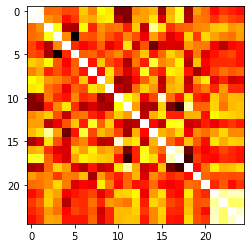

In [1112]:
plt.imshow(FINAL_TABLE_2.corr(), cmap='hot', interpolation='nearest')
plt.show()

In [1440]:
### check the correalation for Restaurants# fiels
rest_corr = FINAL_TABLE_2.corr()['Restaurants#']
rest_corr.sort_values()

### Conclusion 2:
- select 'Job_Density' 
- select: 'Median_Income_H','Anxiety', 'Active_Business', 'Bars#', 'Coffee#', 'Extra#', 'Suvirval_Rate_2Years'
    'Population'


In [1462]:
##selected features
FINAL_TABLE_2[['Area_Name','Job_Density','Median_Income_H','Anxiety',
               'Bars#', 'Coffee#', 'Extra#', 'Suvirval_Rate_2Years','Population']].head()

,Area_Name,Job_Density,Median_Income_H,Anxiety,Bars#,Coffee#,Extra#,Suvirval_Rate_2Years,Population
0,Barnet,0.69,54530,2.75,2.0,4.0,15.0,70.0,385108
1,Bexley,0.54,44430,3.29,3.0,0.0,3.0,75.0,243303
2,Brent,0.61,39630,2.92,1.0,4.0,7.0,70.0,328568
3,Bromley,0.64,55140,3.26,4.0,6.0,23.0,77.0,326560
4,Camden,2.25,67990,3.61,16.0,10.0,32.0,69.0,240595


### Create clustering based on the above conclusions

In [1465]:
restaurant_london2_dummies.groupby('Neighborhood').mean().head()

,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Burger Joint,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Persian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barnet,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.000000,0.000000,0.0,0.0,0.111111,0.0,0.222222,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.222222,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Bexley,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.400000,0.0,0.000000,0.000000,0.0,0.2,0.200000,0.0,0.200000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Brent,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0,0.0,0.250000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Bromley,0.0,0.000000,0.000000,0.0,0.100000,0.0,0.0,0.0,0.100000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.1,0.000000,0.0,0.0,0.0,0.200000,0.0,0.1,0.000000,0.000000,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.000000,0.000000
Camden,0.0,0.037037,0.037037,0.0,0.037037,0.0,0.0,0.0,0.185185,0.0,0.074074,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.037037,0.037037,0.0,0.0,0.000000,0.0,0.148148,0.0,0.037037,0.037037,0.0,0.037037,0.0,0.0,0.037037,0.0,0.0,0.0,0.037037,0.0,0.0,0.037037,0.000000,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074074,0.074074


In [1466]:
temp1 = pd.merge(FINAL_TABLE_2[['Area_Name','Job_Density','Median_Income_H','Anxiety',
               'Bars#', 'Coffee#', 'Extra#', 'Suvirval_Rate_2Years','Population']],
                restaurant_london2_dummies.groupby('Neighborhood').mean(), left_on='Area_Name',
                right_on=['Neighborhood'])

In [1468]:
X_Reduced = StandardScaler().fit_transform(temp1.drop(['Area_Name'],axis=1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1477]:
X_Reduced_Simple = StandardScaler().fit_transform(FINAL_TABLE_2[['Job_Density','Median_Income_H','Anxiety',
               'Bars#', 'Coffee#', 'Extra#', 'Suvirval_Rate_2Years','Population']])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1470]:
#cluster for X_Reduced
clusterNum = 5
k_means_reduced1 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_reduced1.fit(X_Reduced)
labels_reduced1 = k_means_reduced1.labels_

In [1478]:
#cluster for X_Reduced_Simple
clusterNum = 5
k_means_reduced2 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_reduced2.fit(X_Reduced_Simple)
labels_reduced2 = k_means_reduced1.labels_

In [1689]:
FINAL_TABLE_2[['Job_Density','Median_Income_H','Anxiety',
               'Bars#', 'Coffee#', 'Extra#', 'Suvirval_Rate_2Years','Population']].head()

,Job_Density,Median_Income_H,Anxiety,Bars#,Coffee#,Extra#,Suvirval_Rate_2Years,Population
0,0.69,54530,2.75,2.0,4.0,15.0,70.0,385108
1,0.54,44430,3.29,3.0,0.0,3.0,75.0,243303
2,0.61,39630,2.92,1.0,4.0,7.0,70.0,328568
3,0.64,55140,3.26,4.0,6.0,23.0,77.0,326560
4,2.25,67990,3.61,16.0,10.0,32.0,69.0,240595


In [1479]:
FINAL_TABLE_2['Cluster_Reduced2'] = labels_reduced2
FINAL_TABLE_2['Cluster_Reduced1'] = labels_reduced1

In [1710]:
FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced1']==2].describe()

,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#,Cluster,Cluster2,Cluster_Reduced1,Cluster_Reduced2
count,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.00,4.0,4.0
mean,240129.250000,122.700000,90.100000,18.32500,9.900000,40.550000,70.825000,65347.500000,1.142500,14466.250000,69.5,7.300000,3.365000,51.507045,-0.080120,18.750000,6.750000,5.250000,31.750000,2.75,2.25,2.0,2.0
std,61680.321132,43.886065,3.623074,2.88603,3.623074,9.667299,1.987251,34325.196164,0.416043,4210.123464,1.0,0.207686,0.254755,0.023632,0.089927,7.973916,4.787136,1.707825,7.675719,1.50,1.50,0.0,0.0
min,158447.000000,58.800000,85.600000,15.90000,5.700000,32.900000,68.200000,44370.000000,0.520000,8975.000000,69.0,7.170000,3.100000,51.482084,-0.199123,10.000000,3.000000,3.000000,23.000000,1.00,1.00,2.0,2.0
25%,210909.500000,111.600000,88.450000,15.97500,8.100000,35.825000,69.850000,45382.500000,1.120000,12470.000000,69.0,7.192500,3.220000,51.494767,-0.124710,14.500000,3.000000,4.500000,26.750000,1.75,1.00,2.0,2.0
50%,252132.500000,139.500000,90.250000,17.80000,9.750000,37.300000,71.250000,50335.000000,1.330000,15090.000000,69.0,7.210000,3.330000,51.503833,-0.058408,18.000000,5.500000,5.500000,32.000000,3.00,2.00,2.0,2.0
75%,281352.250000,150.600000,91.900000,20.15000,11.550000,42.025000,72.225000,70300.000000,1.352500,17086.250000,69.5,7.317500,3.475000,51.516111,-0.013819,22.250000,9.250000,6.250000,37.000000,4.00,3.25,2.0,2.0
max,297805.000000,153.000000,94.300000,21.80000,14.400000,54.700000,72.600000,116350.000000,1.390000,18710.000000,71.0,7.610000,3.700000,51.538429,-0.004542,29.000000,13.000000,7.000000,40.000000,4.00,4.00,2.0,2.0


In [1703]:
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced2'] ==0]

# FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced2'] ==1]

# FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced2'] ==2]

# FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced2'] ==3]

# FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced2'] ==4]

In [1482]:
FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced2'] ==1]

,Area_Name,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,Fist_Migrants,Second_Migrants,Third_Migrants,Cluster,Cluster2,Cluster_Reduced1,Cluster_Reduced2
3,Bromley,326560,21.7,88.4,15.8,11.6,17.2,75.3,55140,0.64,14825,77.0,7.54,3.26,51.402805,0.014814,10.0,4.0,6.0,23.0,Pizza Place,Burger Joint,Mexican Restaurant,Sandwich Place,Asian Restaurant,Turkish Restaurant,Portuguese Restaurant,Fast Food Restaurant,Sushi Restaurant,Ramen Restaurant,India,Ireland,Nigeria,4,4,1,1
4,Camden,240595,109.8,82.8,8.8,17.2,42.4,69.2,67990,2.25,29020,69.0,7.14,3.61,51.542305,-0.139560,27.0,16.0,10.0,32.0,Burger Joint,Italian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Fish & Chips Shop,Sandwich Place,Ramen Restaurant,Pizza Place,Middle Eastern Restaurant,United States,Bangladesh,Ireland,1,1,1,1
6,Croydon,383408,44.4,87.0,22.3,13.0,29.7,75.4,45120,0.58,14400,74.0,7.10,3.30,51.371305,-0.101957,10.0,4.0,6.0,7.0,Malay Restaurant,Italian Restaurant,Mediterranean Restaurant,Indian Restaurant,Spanish Restaurant,Caribbean Restaurant,Burger Joint,Sushi Restaurant,Asian Restaurant,Portuguese Restaurant,India,Jamaica,Ghana,4,4,1,1
7,Ealing,348533,63.5,88.3,21.2,11.7,45.5,72.7,45690,0.70,17475,74.0,7.29,3.57,51.512655,-0.305195,30.0,9.0,13.0,47.0,Burger Joint,Vietnamese Restaurant,Italian Restaurant,Pizza Place,Thai Restaurant,Fast Food Restaurant,Southern / Soul Food Restaurant,Greek Restaurant,French Restaurant,Sandwich Place,India,Poland,Ireland,1,1,1,1
10,Hackney,270912,141.1,92.7,20.4,7.3,38.9,69.0,42690,0.70,16095,74.0,7.03,3.76,51.543240,-0.049362,4.0,6.0,6.0,14.0,Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Persian Restaurant,Turkey,Nigeria,Jamaica,4,2,1,1
14,Havering,251611,22.3,81.5,19.5,18.5,11.9,76.5,44430,0.60,9445,77.0,7.39,3.28,51.544369,-0.144303,14.0,12.0,10.0,33.0,Vegetarian / Vegan Restaurant,Burger Joint,Caribbean Restaurant,Sandwich Place,Fast Food Restaurant,Falafel Restaurant,Portuguese Restaurant,French Restaurant,Fish & Chips Shop,Turkish Restaurant,Ireland,India,Nigeria,1,4,1,1
19,Kingston upon Thames,173853,46.3,87.0,19.0,13.0,29.2,74.4,56920,0.73,8520,79.0,7.34,3.29,51.409627,-0.306262,30.0,10.0,15.0,45.0,Italian Restaurant,Thai Restaurant,Sandwich Place,Burger Joint,Sushi Restaurant,Vietnamese Restaurant,Portuguese Restaurant,Restaurant,German Restaurant,French Restaurant,Sri Lanka,India,Korea (South),1,4,1,1
21,Lewisham,299817,84.7,90.7,20.6,9.3,30.9,75.9,43360,0.44,9625,75.0,7.18,3.43,51.462432,-0.010133,10.0,2.0,6.0,32.0,Restaurant,Fast Food Restaurant,African Restaurant,Turkish Restaurant,Fish & Chips Shop,Portuguese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Jamaica,Nigeria,Poland,4,2,1,1
22,Merton,207141,55.7,87.9,20.5,12.1,41.1,78.8,57160,0.70,11225,72.0,7.28,3.56,51.410803,-0.188099,3.0,2.0,0.0,9.0,Thai Restaurant,Brazilian Restaurant,Sushi Restaurant,Afghan Restaurant,Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Poland,Sri Lanka,South Africa,4,4,1,1
28,Wandsworth,318253,93.8,90.6,17.3,9.4,32.8,78.8,66220,0.59,17445,75.0,7.37,3.59,51.457027,-0.193261,9.0,3.0,5.0,21.0,Asian Restaurant,Restaurant,Thai Restaurant,Burger Joint,Indian Restaurant,Pizza Place,Portuguese Restaurant,Sandwich Place,Afghan Restaurant,Mexican Restaurant,Poland,South Africa,Ireland,4,4,1,1


In [1483]:
FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced2'] ==2]

,Area_Name,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,Fist_Migrants,Second_Migrants,Third_Migrants,Cluster,Cluster2,Cluster_Reduced1,Cluster_Reduced2
9,Greenwich,275868,58.8,89.4,21.8,10.6,32.9,72.1,44370,0.52,8975,71.0,7.20,3.40,51.482084,-0.004542,10.0,8.0,3.0,36.0,Burger Joint,Pizza Place,English Restaurant,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,French Restaurant,Portuguese Restaurant,Romanian Restaurant,Middle Eastern Restaurant,Nigeria,Nepal,India,4,4,2,2
17,Islington,228397,153.0,91.1,16.0,8.9,36.8,72.6,54950,1.39,18710,69.0,7.17,3.70,51.538429,-0.099905,29.0,13.0,5.0,40.0,Burger Joint,Mediterranean Restaurant,Mexican Restaurant,Sushi Restaurant,Japanese Restaurant,Restaurant,French Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant,Ireland,Turkey,United States,1,1,2,2
18,Kensington and Chelsea,158447,129.2,85.6,15.9,14.4,54.7,68.2,116350,1.32,13635,69.0,7.61,3.10,51.498995,-0.199123,16.0,3.0,7.0,23.0,Burger Joint,Modern European Restaurant,Italian Restaurant,Restaurant,Mediterranean Restaurant,Sandwich Place,Portuguese Restaurant,Persian Restaurant,English Restaurant,Sushi Restaurant,United States,France,Italy,4,1,2,2
27,Tower Hamlets,297805,149.8,94.3,19.6,5.7,37.8,70.4,45720,1.34,16545,69.0,7.22,3.26,51.508672,-0.016912,20.0,3.0,6.0,28.0,Burger Joint,English Restaurant,Sushi Restaurant,Pizza Place,Steakhouse,Japanese Restaurant,Italian Restaurant,Ramen Restaurant,Spanish Restaurant,Chinese Restaurant,Bangladesh,India,China,2,3,2,2


In [1484]:
FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced2'] ==3]

,Area_Name,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,Fist_Migrants,Second_Migrants,Third_Migrants,Cluster,Cluster2,Cluster_Reduced1,Cluster_Reduced2
5,City of London,8548,28.9,90.6,27.2,9.4,0.0,64.6,99390,84.6,19250,63.0,6.59,5.57,51.515618,-0.091998,33.0,7.0,12.0,48.0,Italian Restaurant,Steakhouse,French Restaurant,Seafood Restaurant,Restaurant,Vietnamese Restaurant,Modern European Restaurant,Asian Restaurant,Sushi Restaurant,Indian Restaurant,United States,France,Australia,3,0,3,3


In [1485]:
FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced2'] ==4]

,Area_Name,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,Fist_Migrants,Second_Migrants,Third_Migrants,Cluster,Cluster2,Cluster_Reduced1,Cluster_Reduced2
0,Barnet,385108,44.5,83.3,21.0,16.7,35.9,68.5,54530,0.69,24555,70.0,7.48,2.75,51.653090,-0.200226,9.0,2.0,4.0,15.0,Restaurant,Italian Restaurant,Fast Food Restaurant,Indian Restaurant,Pizza Place,Chinese Restaurant,Afghan Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,India,Poland,Iran,4,1,4,4
1,Bexley,243303,39.9,89.0,20.8,11.0,16.1,75.1,44430,0.54,8430,75.0,7.38,3.29,51.441679,0.150488,5.0,3.0,0.0,3.0,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,Afghan Restaurant,Malay Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Nigeria,India,Ireland,4,4,4,4
2,Brent,328568,76.1,82.5,20.1,17.5,56.2,69.5,39630,0.61,14680,70.0,7.25,2.92,51.563826,-0.275760,4.0,1.0,4.0,7.0,Sandwich Place,Indian Restaurant,Burger Joint,Fast Food Restaurant,Romanian Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Persian Restaurant,India,Poland,Ireland,4,1,4,4
8,Enfield,330968,41.0,87.2,22.7,12.8,32.8,73.0,41250,0.61,13015,74.0,7.26,2.60,51.652085,-0.081018,13.0,4.0,8.0,35.0,Sandwich Place,Fish & Chips Shop,Turkish Restaurant,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Chinese Restaurant,Pizza Place,Restaurant,Italian Restaurant,Turkey,Cyprus (Not otherwise specified),Poland,4,2,4,4
11,Hammersmith and Fulham,183354,111.8,89.9,17.0,10.1,41.5,77.5,62910,1.16,13465,69.0,7.41,3.09,51.492038,-0.223640,22.0,12.0,13.0,44.0,Sandwich Place,Sushi Restaurant,Fast Food Restaurant,Turkish Restaurant,Pizza Place,Burger Joint,English Restaurant,Indian Restaurant,Italian Restaurant,Portuguese Restaurant,France,Ireland,Australia,0,4,4,4
13,Harrow,250703,49.8,85.0,20.7,15.0,50.7,73.9,49060,0.56,14000,75.0,7.33,2.71,51.596769,-0.337275,3.0,0.0,1.0,2.0,Afghan Restaurant,Indian Restaurant,Sandwich Place,Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Persian Restaurant,India,Kenya,Sri Lanka,4,1,4,4
15,Hillingdon,299474,25.8,87.0,21.2,13.0,33.1,73.2,44950,1.15,12485,74.0,7.37,3.47,51.542519,-0.448335,2.0,1.0,0.0,1.0,Chinese Restaurant,Fast Food Restaurant,Afghan Restaurant,Romanian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Persian Restaurant,India,Pakistan,Ireland,4,4,4,4
16,Hounslow,272102,48.9,88.7,21.0,11.3,47.8,74.2,44490,0.92,13035,74.0,7.31,3.39,51.468613,-0.361347,15.0,1.0,7.0,29.0,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Chinese Restaurant,Romanian Restaurant,Asian Restaurant,Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,India,Poland,Pakistan,4,1,4,4
20,Lambeth,325455,121.4,92.2,17.5,7.8,33.6,78.5,48610,0.78,20900,68.0,7.14,3.53,51.501301,-0.117287,20.0,8.0,7.0,32.0,Sandwich Place,Steakhouse,Italian Restaurant,Restaurant,Korean Restaurant,Thai Restaurant,French Restaurant,Burger Joint,Latin American Restaurant,Chinese Restaurant,Jamaica,Portugal,Poland,4,2,4,4
23,Newham,337378,93.5,93.1,21.9,6.9,51.8,66.2,34260,0.49,9645,68.0,7.12,3.37,51.530000,0.029318,1.0,2.0,1.0,0.0,Fast Food Restaurant,Afghan Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Persian Restaurant,Pizza Place,India,Bangladesh,Pakistan,4,1,4,4


In [1708]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['#7B241C', '#1B4F72 ', '#F39C12', '#16A085' ,'#1C2833']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(FINAL_TABLE_2['Latitude'], FINAL_TABLE_2['Longitude'], FINAL_TABLE_2['Area_Name'], labels_reduced1):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

# Identify top 10 (restaurants or venues)

In [ ]:
#get top10 venues based on the ff grouping -
top10 = []
for i in range(0,ff.groupby(['Neighborhood']).mean().reset_index().shape[0]):
    top10.append(list(ff.groupby(['Neighborhood']).mean().reset_index().iloc[::,6::].iloc[i,::].to_frame().sort_values(by=i, ascending=False)[0:10].T.columns))

In [ ]:
## add the nationality 
## add the top 10 restaurants 
## add top 10 store
## create the dummy on restaurants only

In [ ]:
# list(ff.groupby(['Neighborhood']).mean().reset_index().iloc[::,6::].iloc[i,::].to_frame().sort_values(by=i, 
#                                                                                                       ascending=False)[0:10].T.columns))

In [1617]:
# ff.iloc[::,6::].iloc[1,::].to_frame()

## Get top 10 restaurants based on venues 4

In [1170]:
london_venues4_dummies = london_venues4.Neighborhood.to_frame().join(pd.get_dummies(london_venues4['Venue Category']))

In [1196]:
# london_venues4_dummies.groupby(['Neighborhood']).sum().iloc[::,0::].iloc[1,::].to_frame().sort_values(by='Barnet',
# ascending=False)[0:10].T.columns

In [1201]:
# top10_all2 = []
# for i in range(0,london_venues4_dummies.groupby(['Neighborhood']).sum().reset_index().shape[0]):
#     #print(london_venues4_dummies.groupby(['Neighborhood']).sum().reset_index()['Neighborhood'])
#     top10_all2.append(list(london_venues4_dummies.groupby(['Neighborhood']).sum().reset_index().iloc[::,1::].iloc[i,::].to_frame().sort_values(by=i, ascending=False)[0:10].T.columns))

In [1197]:
restaurant_london2_dummies = restaurant_london2.Neighborhood.to_frame().join(pd.get_dummies(restaurant_london2['Venue Category']))

In [1205]:
top10_restaurants2 = []
for i in range(0,restaurant_london2_dummies.groupby(['Neighborhood']).sum().reset_index().shape[0]):
    top10_restaurants2.append(list(restaurant_london2_dummies.groupby(['Neighborhood']).sum().reset_index().iloc[::,1::].iloc[i,::].to_frame().sort_values(by=i, 
    ascending=False)[0:10].T.columns))

    
    

In [1214]:
## create a df out of the top 10 restaurants
top_10_restaurants_df = restaurant_london2_dummies.groupby(['Neighborhood']).sum().reset_index()['Neighborhood'].to_frame()

In [1215]:
top_10_restaurants_df['Top_10'] = top10_restaurants2

In [1218]:
top_10_restaurants_df[["1st","2nd","3rd","4th","5th","6th","7th","8th",
     "9th","10th"]] = top_10_restaurants_df['Top_10'].apply(pd.Series)

In [1227]:
top5_rest_nationality = top_10_restaurants_df.merge(df_all[['Area_Name','Fist_Migrants',
        'Second_Migrants','Third_Migrants']],left_on='Neighborhood',
        right_on='Area_Name', how='left').drop(['Top_10','Area_Name','6th','7th','8th','9th','10th'],axis=1)

### Agregate the top 5 restaurants with top migrations per area

In [1229]:
top5_rest_nationality.head()

,Neighborhood,1st,2nd,3rd,4th,5th,Fist_Migrants,Second_Migrants,Third_Migrants
0,Barnet,Restaurant,Italian Restaurant,Fast Food Restaurant,Indian Restaurant,Pizza Place,India,Poland,Iran
1,Bexley,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,Afghan Restaurant,Nigeria,India,Ireland
2,Brent,Sandwich Place,Indian Restaurant,Burger Joint,Fast Food Restaurant,Romanian Restaurant,India,Poland,Ireland
3,Bromley,Pizza Place,Burger Joint,Mexican Restaurant,Sandwich Place,Asian Restaurant,India,Ireland,Nigeria
4,Camden,Burger Joint,Italian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,United States,Bangladesh,Ireland


### Add top 10 and migrants to the FINAL TABLE

In [1240]:
FINAL_TABLE_2 = FINAL_TABLE_2.merge(top_10_restaurants_df, left_on='Area_Name',
    right_on='Neighborhood').merge(df_all[['Area_Name','Fist_Migrants',
        'Second_Migrants','Third_Migrants']],on='Area_Name')

In [1619]:
FINAL_TABLE_2.head()

,Area_Name,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,Fist_Migrants,Second_Migrants,Third_Migrants,Cluster,Cluster2,Cluster_Reduced1,Cluster_Reduced2
0,Barnet,385108,44.5,83.3,21.0,16.7,35.9,68.5,54530,0.69,24555,70.0,7.48,2.75,51.653090,-0.200226,9.0,2.0,4.0,15.0,Restaurant,Italian Restaurant,Fast Food Restaurant,Indian Restaurant,Pizza Place,Chinese Restaurant,Afghan Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,India,Poland,Iran,4,1,4,4
1,Bexley,243303,39.9,89.0,20.8,11.0,16.1,75.1,44430,0.54,8430,75.0,7.38,3.29,51.441679,0.150488,5.0,3.0,0.0,3.0,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,Afghan Restaurant,Malay Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Nigeria,India,Ireland,4,4,4,4
2,Brent,328568,76.1,82.5,20.1,17.5,56.2,69.5,39630,0.61,14680,70.0,7.25,2.92,51.563826,-0.275760,4.0,1.0,4.0,7.0,Sandwich Place,Indian Restaurant,Burger Joint,Fast Food Restaurant,Romanian Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Persian Restaurant,India,Poland,Ireland,4,1,4,4
3,Bromley,326560,21.7,88.4,15.8,11.6,17.2,75.3,55140,0.64,14825,77.0,7.54,3.26,51.402805,0.014814,10.0,4.0,6.0,23.0,Pizza Place,Burger Joint,Mexican Restaurant,Sandwich Place,Asian Restaurant,Turkish Restaurant,Portuguese Restaurant,Fast Food Restaurant,Sushi Restaurant,Ramen Restaurant,India,Ireland,Nigeria,4,4,1,1
4,Camden,240595,109.8,82.8,8.8,17.2,42.4,69.2,67990,2.25,29020,69.0,7.14,3.61,51.542305,-0.139560,27.0,16.0,10.0,32.0,Burger Joint,Italian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Fish & Chips Shop,Sandwich Place,Ramen Restaurant,Pizza Place,Middle Eastern Restaurant,United States,Bangladesh,Ireland,1,1,1,1


### Conclusions
- households and population has a very high correlation so one howsholds will be dropped
- median income and house price has a high correlation so house price will be dropped
- life satisfaction and happiness have a high correlation so happiness will be dropped

In [1250]:
FINAL_TABLE_2.drop(['Households','Unemployment','Annual_Pay', 
                    'Crime','House_Price', 'Happiness', 'Neighborhood',
                   'Top_10'],axis=1, inplace=True )

### Get Migrants Dummy

In [1314]:
migrants_dummy = pd.get_dummies(FINAL_TABLE_2[['Fist_Migrants','Second_Migrants','Third_Migrants']])

migrants_dummy['Area_Name'] = FINAL_TABLE_2.Area_Name

In [1685]:
FINAL_TABLE2_TO_KMEAN2.head()

,Area_Name,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Fist_Migrants_Bangladesh,Fist_Migrants_France,Fist_Migrants_India,Fist_Migrants_Ireland,Fist_Migrants_Jamaica,Fist_Migrants_Nigeria,Fist_Migrants_Poland,Fist_Migrants_Sri Lanka,Fist_Migrants_Turkey,Fist_Migrants_United States,Second_Migrants_Bangladesh,Second_Migrants_Cyprus (Not otherwise specified),Second_Migrants_France,Second_Migrants_India,Second_Migrants_Ireland,Second_Migrants_Jamaica,Second_Migrants_Kenya,Second_Migrants_Nepal,Second_Migrants_Nigeria,Second_Migrants_Pakistan,Second_Migrants_Poland,Second_Migrants_Portugal,Second_Migrants_South Africa,Second_Migrants_Sri Lanka,Second_Migrants_Turkey,Third_Migrants_Australia,Third_Migrants_China,Third_Migrants_Ghana,Third_Migrants_India,Third_Migrants_Iran,Third_Migrants_Ireland,Third_Migrants_Italy,Third_Migrants_Jamaica,Third_Migrants_Korea (South),Third_Migrants_Nigeria,Third_Migrants_Pakistan,Third_Migrants_Poland,Third_Migrants_South Africa,Third_Migrants_Sri Lanka,Third_Migrants_United States
0,Barnet,385108,44.5,83.3,21.0,16.7,35.9,68.5,54530,70.0,7.48,2.75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Bexley,243303,39.9,89.0,20.8,11.0,16.1,75.1,44430,75.0,7.38,3.29,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Brent,328568,76.1,82.5,20.1,17.5,56.2,69.5,39630,70.0,7.25,2.92,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Bromley,326560,21.7,88.4,15.8,11.6,17.2,75.3,55140,77.0,7.54,3.26,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Camden,240595,109.8,82.8,8.8,17.2,42.4,69.2,67990,69.0,7.14,3.61,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Concert the FINAL TABLE FOR CLASSIFICATION

In [1317]:
FINAL_TABLE2_TO_KMEAN = FINAL_TABLE_2.drop(['Latitude','Longitude','1st', '2nd',
        '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th',
        'Fist_Migrants', 
        'Second_Migrants', 'Third_Migrants'], axis=1).merge(restaurant_london2_dummies.groupby('Neighborhood').sum(),
        left_on='Area_Name', right_on='Neighborhood').merge(migrants_dummy,on='Area_Name')

FINAL_TABLE_2.columns

# pd.get_dummies(FINAL_TABLE_2[['1st', '2nd',
#        '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']])

FINAL_TABLE2_TO_KMEAN.head()

FINAL_TABLE2_TO_KMEAN2 = FINAL_TABLE_2.drop(['Latitude','Longitude','1st', '2nd',
        '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th',
        'Fist_Migrants', 'Restaurants#', 'Bars#', 'Coffee#', 'Extra#',
                    'Job_Density', 'Active_Business','Cluster',
        'Second_Migrants', 'Third_Migrants'], axis=1).merge(migrants_dummy,on='Area_Name')

X4 = StandardScaler().fit_transform(FINAL_TABLE2_TO_KMEAN.drop(['Area_Name'],axis=1))

X5 = StandardScaler().fit_transform(FINAL_TABLE2_TO_KMEAN2.drop(['Area_Name'],axis=1))



In [ ]:
clusterNum = 5
k_means_final = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_final.fit(X4)
labels_final = k_means_final.labels_

k_means_final2 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 30)
k_means_final2.fit(X5)
labels_final2 = k_means_final2.labels_

In [1422]:
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster'] == 0]
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster'] == 1]
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster'] == 2]
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster'] == 3]
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster'] == 4]

,Area_Name,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,Fist_Migrants,Second_Migrants,Third_Migrants,Cluster,Cluster2
11,Hammersmith and Fulham,183354,111.8,89.9,17.0,10.1,41.5,77.5,62910,1.16,13465,69.0,7.41,3.09,51.492038,-0.223640,22.0,12.0,13.0,44.0,Sandwich Place,Sushi Restaurant,Fast Food Restaurant,Turkish Restaurant,Pizza Place,Burger Joint,English Restaurant,Indian Restaurant,Italian Restaurant,Portuguese Restaurant,France,Ireland,Australia,0,4
25,Southwark,310642,108.2,92.1,18.1,7.9,35.9,74.2,48000,1.29,15860,71.0,7.47,3.42,51.502922,-0.103458,35.0,21.0,10.0,34.0,Sandwich Place,Italian Restaurant,Burger Joint,Chinese Restaurant,Turkish Restaurant,English Restaurant,Ramen Restaurant,Restaurant,Mexican Restaurant,Modern European Restaurant,Nigeria,Jamaica,Ireland,0,4


In [1355]:
FINAL_TABLE_2['Cluster2'] = labels_final2

# FINAL_TABLE_2[FINAL_TABLE_2['Cluster2'] == 0]
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster2'] == 1]
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster2'] == 2]
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster2'] == 3]
# FINAL_TABLE_2[FINAL_TABLE_2['Cluster2'] == 4]

In [1686]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['#7B241C', '#1B4F72 ', '#F39C12', '#16A085' ,'#1C2833']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(FINAL_TABLE_2['Latitude'], FINAL_TABLE_2['Longitude'], FINAL_TABLE_2['Area_Name'], labels_final):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [1681]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['#7B241C', '#1B4F72 ', '#F39C12', '#16A085' ,'#1C2833', '#979A9A']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(FINAL_TABLE_2['Latitude'], FINAL_TABLE_2['Longitude'], FINAL_TABLE_2['Area_Name'], labels_final1):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'labels_final1' is not defined

### Not adding the venues items and filtering the inner city 

In [1655]:

a = FINAL_TABLE_2.merge(df_all[['Area_Name','Inner_London']], 
                    on='Area_Name')[FINAL_TABLE_2.merge(df_all[['Area_Name','Inner_London']], 
                    on='Area_Name')['Inner_London'] == 'Inner London'].loc[::,
                    'Area_Name':'Anxiety'].drop(['Area_Name'],axis=1)

X_A = StandardScaler().fit_transform(a)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1656]:
k_means_A = KMeans(init = "k-means++", n_clusters = 5, n_init = 30)
k_means_A.fit(X_A)
labels_final_A = k_means_A.labels_

In [1674]:
a.columns

Index(['Population', 'Population_Density', 'Working_Population',
       'Youth_Population', 'Elderly_Population', 'Born_Abroad', 'Employment',
       'Median_Income_H', 'Job_Density', 'Active_Business',
       'Suvirval_Rate_2Years', 'Life_Satisfcation', 'Anxiety'],
      dtype='object')

In [1658]:
a_1 = FINAL_TABLE_2.merge(df_all[['Area_Name','Inner_London']], 
                    on='Area_Name')[FINAL_TABLE_2.merge(df_all[['Area_Name','Inner_London']], 
                    on='Area_Name')['Inner_London'] == 'Inner London']

In [1671]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['#7B241C', '#1B4F72 ', '#F39C12', '#16A085']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(a_1['Latitude'], a_1['Longitude'], a_1['Area_Name'], labels_final_A):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## A different alternative of the reduced data set- just the inner city 

In [1592]:
alternative = test_final2.iloc[::,1:25].join(test_final2.iloc[::,-10:-1])

#alternative.columns

alternative_cluster = alternative.drop(['Inner_London','Fist_Migrants','Second_Migrants','Third_Migrants'],axis=1)

#pd.get_dummies(alternative_cluster[["1st","2nd","3rd","4th","5th","6th","7th","8th","9th"]])

alternative_cluster = alternative_cluster.join(pd.get_dummies(alternative_cluster[["1st","2nd","3rd","4th","5th","6th","7th","8th","9th"]]))

#alternative_cluster.drop(['Area_Name_x',"1st","2nd","3rd","4th","5th","6th","7th","8th","9th"],axis=1)

alternative_cluster_kmean = StandardScaler().fit_transform(alternative_cluster.drop(['Area_Name_x',"1st","2nd","3rd","4th","5th","6th","7th","8th","9th"],axis=1))

#alternative_cluster.drop(['Area_Name_x',"1st","2nd","3rd","4th","5th","6th","7th","8th","9th"],axis=1).columns

alternative_cluster_kmean

clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(alternative_cluster_kmean)
labels = k_means.labels_



# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['#7B241C', '#1B4F72 ', '#F39C12', '#16A085']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(test_final1['Latitude'], test_final1['Longitude'], test_final1_1['Area_Name'], labels):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1559]:
abc1 = alternative_cluster.iloc[::,0:29]
abc1['Cluster']=labels

In [ ]:
### alternative_cluster splitting in clusters 

In [1591]:
print(abc1[abc1['Cluster']==0].describe())

print(abc1[abc1['Cluster']==1].describe())

print(abc1[abc1['Cluster']==2].describe())

print(abc1[abc1['Cluster']==3].describe().loc['mean',::].to_frame())

          Population     Households  Population_Density  Working_Population  \
count       5.000000       5.000000            5.000000            5.000000   
mean   268092.600000  116748.600000          110.300000           90.880000   
std     59349.232752   23032.208118           26.256237            0.807465   
min    183354.000000   82513.000000           84.700000           89.900000   
25%    228397.000000  103612.000000           93.800000           90.600000   
50%    299817.000000  128966.000000          108.200000           90.700000   
75%    310642.000000  132080.000000          111.800000           91.100000   
max    318253.000000  136572.000000          153.000000           92.100000   

       Youth_Population  Elderly_Population  Born_Abroad  Employment  \
count          5.000000            5.000000     5.000000    5.000000   
mean          17.800000            9.120000    35.580000   75.800000   
std            1.736376            0.807465     4.070258    2.484955   


## All values [Not Usable]

In [1589]:
ALL_VALUES.columns[235:].to_list

<bound method IndexOpsMixin.tolist of Index(['Area_Name', 'Population', 'Population_Density', 'Working_Population',
       'Youth_Population', 'Elderly_Population', 'Born_Abroad', 'Employment',
       'Median_Income_H', 'Job_Density', 'Active_Business',
       'Suvirval_Rate_2Years', 'Life_Satisfcation', 'Anxiety', 'Latitude',
       'Longitude', 'Restaurants#', 'Bars#', 'Coffee#', 'Extra#'],
      dtype='object')>

In [1664]:
ALL_VALUES.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Canal,Candy Store,Caribbean Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Restaurant,River,Road,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Area_Name,Population,Population_Density,Working_Population,Youth_Population,Elderly_Population,Born_Abroad,Employment,Median_Income_H,Job_Density,Active_Business,Suvirval_Rate_2Years,Life_Satisfcation,Anxiety,Latitude,Longitude,Restaurants#,Bars#,Coffee#,Extra#
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0

In [1590]:
FINAL_TABLE_2.iloc[::,0:20]

ALL_VALUES = london_venues4_dummies.groupby(['Neighborhood']).sum().merge(FINAL_TABLE_2.iloc[::,0:20]
                                                             ,left_on='Neighborhood',right_on='Area_Name' )

#ALL_VALUES.columns[235:].to_list

X6 = StandardScaler().fit_transform(ALL_VALUES.drop(['Area_Name','Bars#', 'Coffee#', 'Extra#'],axis=1))

clusterNum = 4
k_means_ALL_VALUES = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_ALL_VALUES.fit(X6)
labels_ALL_VALUES = k_means_ALL_VALUES.labels_

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['#7B241C', '#1B4F72 ', '#F39C12', '#16A085']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ALL_VALUES['Latitude'], ALL_VALUES['Longitude'], ALL_VALUES['Area_Name'], labels_ALL_VALUES):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Analysis of data based on the selected dataframe

In [1760]:
e= FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced1']==0].describe().loc['mean',::].to_frame()
e['1']= FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced1']==1].describe().loc['mean',::]
e['2']= FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced1']==2].describe().loc['mean',::]
e['3']= FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced1']==3].describe().loc['mean',::]
e['4']= FINAL_TABLE_2[FINAL_TABLE_2['Cluster_Reduced1']==4].describe().loc['mean',::]
e.columns = ['0','1','2','3','4']
e.drop(['Latitude','Longitude','Cluster','Cluster2','Cluster_Reduced1','Cluster_Reduced2'],axis=0,inplace=True)
e

,0,1,2,3,4
Population,274803.00,282068.300,240129.2500,8548.00,289986.769231
Population_Density,92.70,68.330,122.7000,28.90,66.176923
Working_Population,90.70,87.690,90.1000,90.60,87.900000
Youth_Population,19.50,18.540,18.3250,27.20,20.446154
Elderly_Population,9.30,12.310,9.9000,9.40,12.100000
Born_Abroad,39.60,31.960,40.5500,0.00,38.607692
Employment,71.30,74.600,70.8250,64.60,73.100000
Median_Income_H,45860.00,52472.000,65347.5000,99390.00,46666.923077
Job_Density,0.48,0.793,1.1425,84.60,0.760769
Active_Business,11875.00,14807.500,14466.2500,19250.00,13952.692308


In [1909]:
# uuu = FINAL_TABLE_2[FINAL_TABLE_2.Cluster_Reduced1==1][['Area_Name',
#                '1st','2nd','3rd','4th','5th']]

In [1908]:
# count = []
# values = []
# for x in set(get_list(uuu,1)):
#     count.append(uuu.isin([x]).sum().sum())
#     #print(x, uuu.isin([x]).sum().sum())
#     values.append(x)

In [1819]:
restaurant_london2['Venue Category'].unique()

array(['Steakhouse', 'Vietnamese Restaurant', 'French Restaurant',
       'Italian Restaurant', 'Seafood Restaurant',
       'Modern European Restaurant', 'New American Restaurant',
       'Latin American Restaurant', 'Indian Restaurant',
       'Falafel Restaurant', 'Udon Restaurant', 'Scandinavian Restaurant',
       'Restaurant', 'Asian Restaurant', 'Mexican Restaurant',
       'Sushi Restaurant', 'English Restaurant', 'Pizza Place',
       'Fast Food Restaurant', 'Chinese Restaurant', 'Greek Restaurant',
       'Sandwich Place', 'Burger Joint', 'Turkish Restaurant',
       'Portuguese Restaurant', 'Caribbean Restaurant',
       'Fish & Chips Shop', 'Vegetarian / Vegan Restaurant',
       'Middle Eastern Restaurant', 'Ramen Restaurant',
       'Kebab Restaurant', 'American Restaurant', 'Korean Restaurant',
       'African Restaurant', 'Malay Restaurant', 'Spanish Restaurant',
       'Mediterranean Restaurant', 'Southern / Soul Food Restaurant',
       'Polish Restaurant', 'Thai Rest

In [1823]:
## Get Top restaurants for all areas

In [1826]:
restaurant_london2.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Ranking,Venue_ID,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.515618,-0.091998,Goodman Steak House Restaurant,0,4c5190663940be9a0f2c0f09,51.514398,-0.090745,Steakhouse
1,City of London,51.515618,-0.091998,Hawksmoor Guildhall,0,4e9d32995503b4a7c128d043,51.515647,-0.090997,Steakhouse
3,City of London,51.515618,-0.091998,City Càphê,0,4cadc734632b370400f7696e,51.514750,-0.091545,Vietnamese Restaurant
13,City of London,51.515618,-0.091998,Coq d'Argent,0,4ac518d5f964a5200fa820e3,51.513303,-0.091036,French Restaurant
14,City of London,51.515618,-0.091998,Manicomio,0,4bf6c59413aed13a6d2aeaf7,51.515369,-0.095414,Italian Restaurant


In [1863]:
rest_clust = restaurant_london2.merge(FINAL_TABLE_2[['Area_Name','Cluster_Reduced1']],
                         left_on= 'Neighborhood', right_on='Area_Name')
cluster_0 = count_values(rest_clust[rest_clust['Cluster_Reduced1']==0]['Venue Category'])
cluster_1 = count_values(rest_clust[rest_clust['Cluster_Reduced1']==1]['Venue Category'])
cluster_2 = count_values(rest_clust[rest_clust['Cluster_Reduced1']==2]['Venue Category'])
cluster_3 = count_values(rest_clust[rest_clust['Cluster_Reduced1']==3]['Venue Category'])
cluster_4 = count_values(rest_clust[rest_clust['Cluster_Reduced1']==4]['Venue Category'])

In [1904]:
rest_clust[rest_clust['Cluster_Reduced1']==4].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Ranking,Venue_ID,Venue Latitude,Venue Longitude,Venue Category,Area_Name,Cluster_Reduced1
33,Barnet,51.65309,-0.200226,Spizzico,0,4d6e3bdd8df1548113847b23,51.656600,-0.201802,Italian Restaurant,Barnet,4
34,Barnet,51.65309,-0.200226,Dudley's Pancake House,0,4bbe2e0d0ec69c747ef65559,51.652965,-0.199625,Restaurant,Barnet,4
35,Barnet,51.65309,-0.200226,Carluccio's,0,5568a960498ef35cab5363bc,51.655254,-0.201862,Italian Restaurant,Barnet,4
36,Barnet,51.65309,-0.200226,Domino's Pizza,0,4bd2049541b9ef3ba724fde5,51.652675,-0.198837,Pizza Place,Barnet,4
37,Barnet,51.65309,-0.200226,KFC,0,4d1f9abadd6a236aead33038,51.655794,-0.201836,Fast Food Restaurant,Barnet,4


In [1912]:
# cluster_0
# cluster_1
# cluster_2
# cluster_3
# cluster_4

In [1862]:
def count_values(element):
    count = []
    values = []
    #print(type(element))
    for elem in element.unique():
        #print(elem, type(element))
        count.append(element.isin([elem]).sum())
        values.append(elem)
    df = pd.DataFrame([values,count])
    df = df.T
    df.columns = ['Rest_Tpye','Count']
    return df.sort_values(by='Count', ascending=False)
#count = []
# values = []
# kjsahdkjsa = FINAL_TABLE_2[['1st','2nd','3rd','4th','5th','6th']]
# for x in restaurant_london2['Venue Category'].unique():
#     count.append(restaurant_london2.isin([x]).sum().sum())
#     #print(x, uuu.isin([x]).sum().sum())
#     values.append(x)

# print(pd.DataFrame([values,count]).T.sort_values(by=1, ascending=False))

In [1906]:
## all restaurants from London area
count = []
values = []
#kjsahdkjsa = FINAL_TABLE_2[['1st','2nd','3rd','4th','5th','6th']]
for x in restaurant_london2['Venue Category'].unique():
    count.append(restaurant_london2.isin([x]).sum().sum())
    #print(x, uuu.isin([x]).sum().sum())
    values.append(x)

pd.DataFrame([values,count]).T.sort_values(by=1, ascending=False).head()

,0,1
3,Italian Restaurant,33
22,Burger Joint,33
21,Sandwich Place,25
18,Fast Food Restaurant,23
12,Restaurant,22


In [1907]:
def get_list(df):
    temp = []
    #df = df.iloc[::,i::]
    for column in df.columns:
        temp = temp + (df[column].to_list())
    return temp